# Data Exploration and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Import the data

In [2]:
df0=pd.read_csv("data/Malaria Cases and Testing 2019.csv")
df0.drop([ 'OrgunitID', 'DataID',  'SubCounty', 'Ward',
       'OrgUnitName', 'Data', 'GapWeight', 'OutlierWeight', 'TotalWeight','MaxModifiedZScore'], axis=1, inplace=True)

In [3]:
df1=pd.read_csv("data/Malaria Cases and Testing 2020.csv")
df1.drop([ 'OrgunitID', 'DataID',  'SubCounty', 'Ward',
       'OrgUnitName', 'Data', 'GapWeight', 'OutlierWeight', 'TotalWeight','MaxModifiedZScore'], axis=1, inplace=True)

In [4]:
df2=pd.read_csv("data/Malaria Cases and Testing 2021.csv")
df2.drop([ 'OrgunitID', 'DataID',  'SubCounty', 'Ward',
       'OrgUnitName', 'Data', 'GapWeight', 'OutlierWeight', 'TotalWeight','MaxModifiedZScore'], axis=1, inplace=True)

## Concatenate all the dataframes to have one

In [5]:
frames=[df0,df1,df2]
df=pd.concat(frames,  ignore_index=True)

In [6]:
print(df.columns)

Index(['year', 'County', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sep', 'oct', 'nov', 'dec', 'MaxZScore'],
      dtype='object')


## Get some summary statistics

### *Number of rows and columns*

In [7]:
print(df.shape)

(50741, 15)


### *Number of counties*

In [8]:
df["County"].describe()

count              50741
unique                47
top       Nairobi County
freq                3415
Name: County, dtype: object

### *See how many rows have null values*

In [9]:
df1=df.isnull()
df2=df[ df1.any(axis=1)]
print(df2.shape)

(45056, 15)


### *Count the nulls in each column*

In [10]:
print(df.isnull().sum())

year             0
County           0
jan          27699
feb          26739
mar          26213
apr          27159
may          26256
jun          25488
jul          25101
aug          25327
sep          25900
oct          24286
nov          22892
dec          24415
MaxZScore        0
dtype: int64


### *Rows with non null values*


In [11]:
print(df['jan'].notnull().sum())

23042


### *Drop rows with null values*

In [12]:
df1=df.dropna(axis=0, how='any')
print(df1.shape)

(5685, 15)


### *Replace null values with zero*

In [13]:
df[2:13].fillna(0, inplace=True)

/tmp/ipykernel_8187/2008611394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[2:13].fillna(0, inplace=True)


## The data has too many values hence visualization will be difficult. Lets group by counties
---

In [14]:

df1=df.groupby(["County", "year"]).aggregate( {'jan':sum, 'feb':sum, 'mar':sum, 'apr':sum, 'may':sum, 'jun':sum, 'jul':sum,
       'aug':sum, 'sep':sum, 'oct':sum, 'nov':sum, 'dec':sum,'MaxZScore':np.mean})


In [15]:
df1.head()

jan      feb     mar     apr     may     jun  \
County         year                                                     
Baringo County 2019   4832.0   3487.0  5297.0  4175.0  3923.0  4182.0   
               2020  14060.0  13176.0  9760.0  4931.0  5441.0  6247.0   
               2021   3961.0   8169.0  8882.0  6735.0  8688.0  9399.0   
Bomet County   2019    855.0    831.0   979.0   759.0   782.0   584.0   
               2020   2254.0   2392.0  1376.0   404.0   365.0   447.0   

                         jul      aug      sep      oct      nov      dec  \
County         year                                                         
Baringo County 2019   5692.0   5465.0  12063.0   7569.0   5410.0   5627.0   
               2020   5809.0   6325.0   7247.0  11559.0  12099.0   5818.0   
               2021  11718.0  16659.0  20697.0  14147.0  12321.0  11031.0   
Bomet County   2019    702.0    665.0    517.0    539.0    506.0    577.0   
               2020    527.0    641.0    575.0   1594.0   1443.0    571.0   

                     MaxZScore  
County         year             
Baringo County 2019   1.513740  
               2020   1.242131  
               2021   1.408853  
Bomet County   2019   1.051068  
               2020   0.978511

### *Reset so that the count and the year are column names*

In [16]:
df1=df1.reset_index()

In [17]:
df1.head(10)

,County,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,MaxZScore
0,Baringo County,2019,4832.0,3487.0,5297.0,4175.0,3923.0,4182.0,5692.0,5465.0,12063.0,7569.0,5410.0,5627.0,1.513740
1,Baringo County,2020,14060.0,13176.0,9760.0,4931.0,5441.0,6247.0,5809.0,6325.0,7247.0,11559.0,12099.0,5818.0,1.242131
2,Baringo County,2021,3961.0,8169.0,8882.0,6735.0,8688.0,9399.0,11718.0,16659.0,20697.0,14147.0,12321.0,11031.0,1.408853
3,Bomet County,2019,855.0,831.0,979.0,759.0,782.0,584.0,702.0,665.0,517.0,539.0,506.0,577.0,1.051068
4,Bomet County,2020,2254.0,2392.0,1376.0,404.0,365.0,447.0,527.0,641.0,575.0,1594.0,1443.0,571.0,0.978511
5,Bomet County,2021,1913.0,1525.0,2278.0,1368.0,1303.0,1952.0,1052.0,1235.0,1077.0,1303.0,1522.0,2202.0,1.007161
6,Bungoma County,2019,26851.0,29240.0,33792.0,41459.0,69337.0,74303.0,110212.0,70966.0,64043.0,63795.0,39232.0,40079.0,1.913933
7,Bungoma County,2020,74140.0,73431.0,75439.0,55647.0,52397.0,59070.0,61880.0,53175.0,51624.0,123405.0,121608.0,63230.0,1.628035
8,Bungoma County,2021,72893.0,119474.0,125210.0,104216.0,138143.0,170224.0,128135.0,155561.0,158577.0,108732.0,100108.0,119773.0,2.077816
9,Busia County,2019,71686.0,44770.0,67346.0,73580.0,100212.0,107645.0,131546.0,76358.0,59312.0,49682.0,31785.0,37185.0,1.887977


### *common descriptive statistics per column*

In [18]:
print(df1['jan'].max())
print(df1['jan'].min())
print(df1['jan'].mean())

135087.0
63.0
14032.900709219859


In [19]:
df1['jan'].describe()

count       141.000000
mean      14032.900709
std       23221.429033
min          63.000000
25%        1144.000000
50%        3434.000000
75%       13871.000000
max      135087.000000
Name: jan, dtype: float64

In [20]:
df2=df1[df1["County"].isin(['Baringo County', 'Bomet County'])]
#df2=df1[~df1["County"].isin(['Baringo County', 'Bomet County'])]

In [21]:
df1.shape

(141, 15)

### *Get data for Baringo County 2019*

In [22]:
df2=df1[(df1["County"].isin(['Baringo County'])) & (df1["year"]==2019)]

In [23]:
df2.head()

,County,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,MaxZScore
0,Baringo County,2019,4832.0,3487.0,5297.0,4175.0,3923.0,4182.0,5692.0,5465.0,12063.0,7569.0,5410.0,5627.0,1.51374


In [24]:
y=list(df2.iloc[0])
y=y[2:-1]

In [25]:
len(y)

12

### *Plot to see if there is an meaningful trend from January to December*

In [26]:
def plot(x,y, format="-r", lineLabel="", xLabel="",yLabel="", title=""):
     fig, ax=plt.subplots()
     ax.plot(x,y, label=lineLabel)
     ax.legend(loc=2)
     ax.set_xlabel(xLabel)
     ax.set_ylabel(yLabel)
     ax.set_xticks(x)
      
    

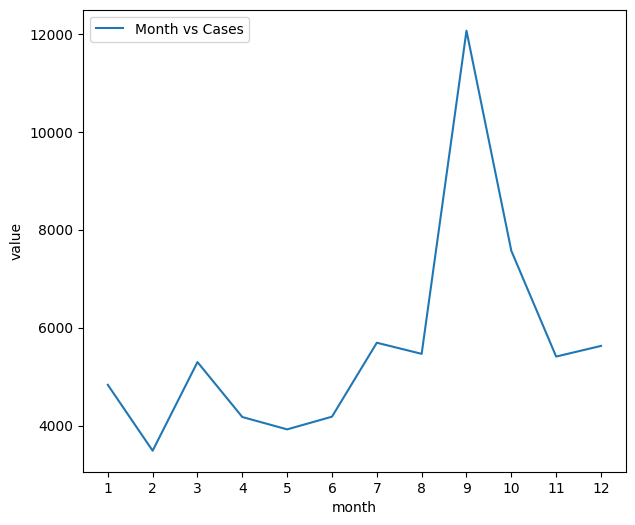

In [27]:
x=range(1,13)
plt.rcParams['figure.figsize']=(7,6)
plot(x,y,lineLabel=r"Month vs Cases", title="Baringo 2019",  xLabel="month",yLabel="value")
plt.show() 
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

### *Plot for Baringo all the three years*

In [28]:
years=list(df1["year"])
counties=list(df1["County"])
length=len(counties)
dfMonths=[]
dfYears=[]
dfCounties=[]
dfValues=[]
for  i, name in enumerate(df1.columns[2:14]):
    values=list(df1[name])
    x=i+1;
    month=[x]*length
    dfCounties.extend(counties)
    dfYears.extend(years)
    dfMonths.extend(month)
    dfValues.extend(values)
df3=pd.DataFrame({"county":dfCounties, "year":dfYears, "month":dfMonths, "value":dfValues})
df3=df3.sort_values(["year","month"])    

In [29]:
#df4=df3[(df3["county"]=="Baringo County") & (df3["year"]==2019) ]
df4=df3[(df3["county"]=="Baringo County")  ]
df4.head()

,county,year,month,value
0,Baringo County,2019,1,4832.0
141,Baringo County,2019,2,3487.0
282,Baringo County,2019,3,5297.0
423,Baringo County,2019,4,4175.0
564,Baringo County,2019,5,3923.0


In [30]:
df4.shape

(36, 4)

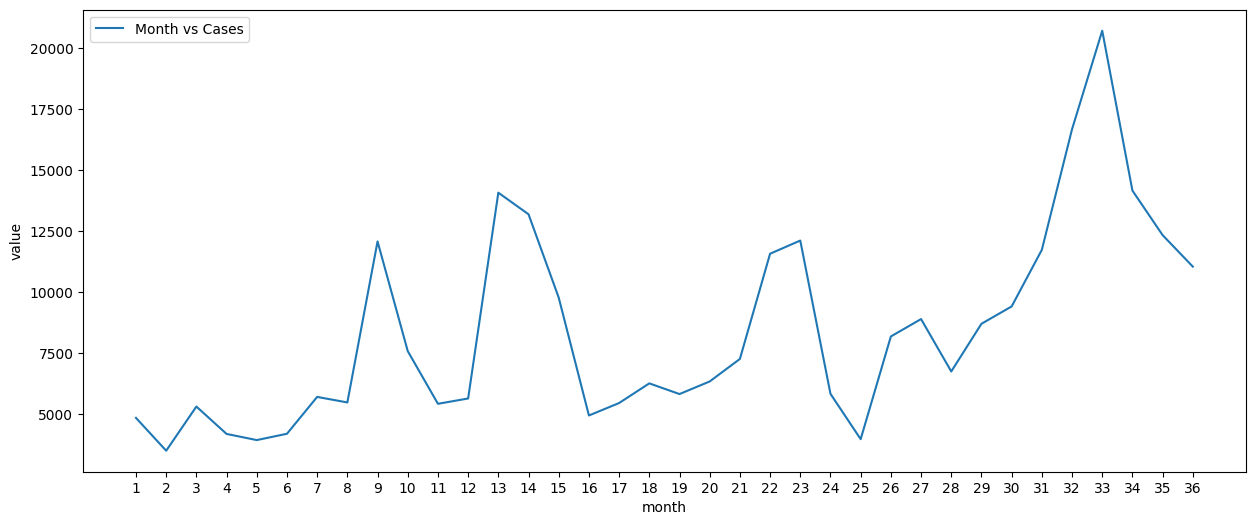

In [31]:
x=range(1,37)
plt.rcParams['figure.figsize']=(15,6)
plot(x,df4["value"],lineLabel=r"Month vs Cases", title="Baringo 2019-2021",  xLabel="month",yLabel="value")
plt.show() 
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

## Scatter plots - To show correlation btn variables

In [32]:
scatterDf=df1[['year','jan','feb','mar']]
scatterDf=scatterDf[scatterDf['year']==2019]
scatterDf=df1[['jan','feb','mar']]

array([[<AxesSubplot: xlabel='jan', ylabel='jan'>,
        <AxesSubplot: xlabel='feb', ylabel='jan'>,
        <AxesSubplot: xlabel='mar', ylabel='jan'>],
       [<AxesSubplot: xlabel='jan', ylabel='feb'>,
        <AxesSubplot: xlabel='feb', ylabel='feb'>,
        <AxesSubplot: xlabel='mar', ylabel='feb'>],
       [<AxesSubplot: xlabel='jan', ylabel='mar'>,
        <AxesSubplot: xlabel='feb', ylabel='mar'>,
        <AxesSubplot: xlabel='mar', ylabel='mar'>]], dtype=object)

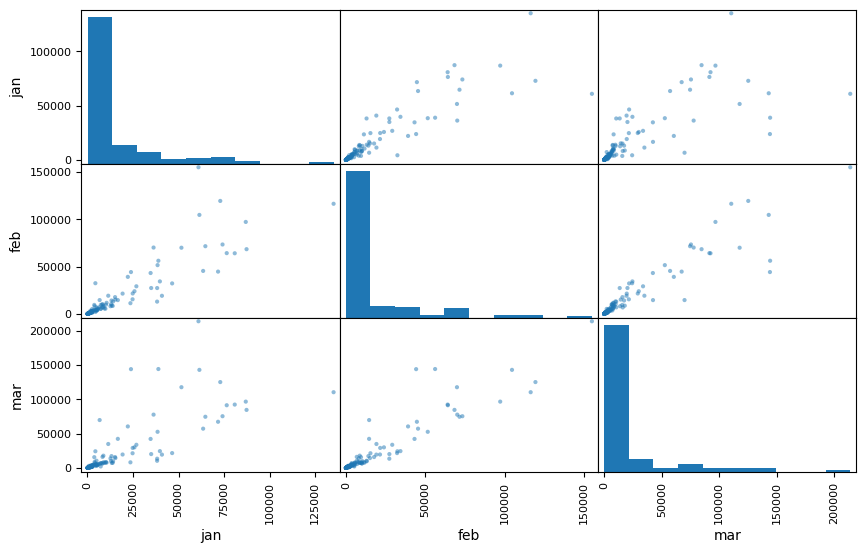

In [33]:
pd.plotting.scatter_matrix(scatterDf, figsize=(10,6))

In [34]:
dfCountySum=df3.groupby(['county']).aggregate({'value':sum})

In [35]:
dfCountySum.head()

,value
county,
Baringo County,302601.0
Bomet County,39615.0
Bungoma County,3029401.0
Busia County,3070050.0
Elgeyo Marakwet County,109281.0


<AxesSubplot: xlabel='county'>

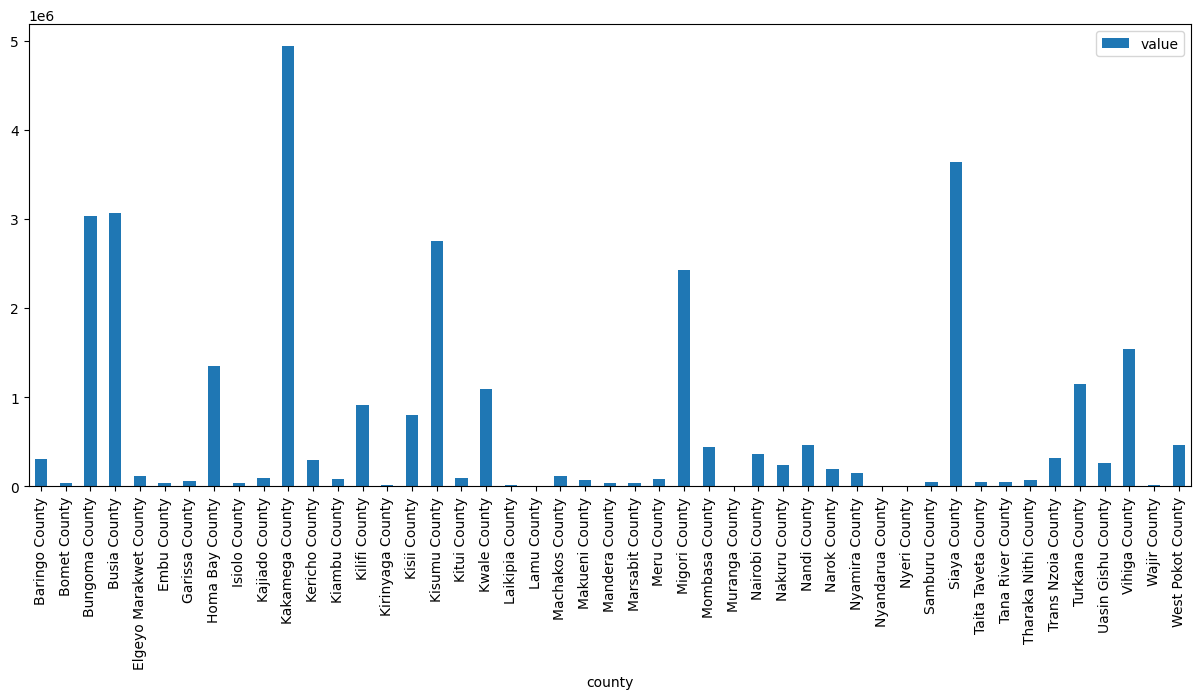

In [36]:
dfCountySum.plot(kind="bar", figsize=(15,6))

## We can save the data in df3 to use later

In [41]:
df3.to_csv("/home/dom/imp/DataScience/py/day 2/data/malaria_cases.csv", index=False)